In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=Warning)
%matplotlib inline

In [2]:
!pip install opendatasets
import opendatasets as od
url = 'https://www.kaggle.com/uciml/pima-indians-diabetes-database'
od.download(url)

Skipping, found downloaded files in "./pima-indians-diabetes-database" (use force=True to force download)


In [3]:
#Reading the  Diabates Dataset
df = pd.read_csv('/content/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From above observation its is clear, there is no missing values in the dataframe

In [6]:
df.shape

(768, 9)

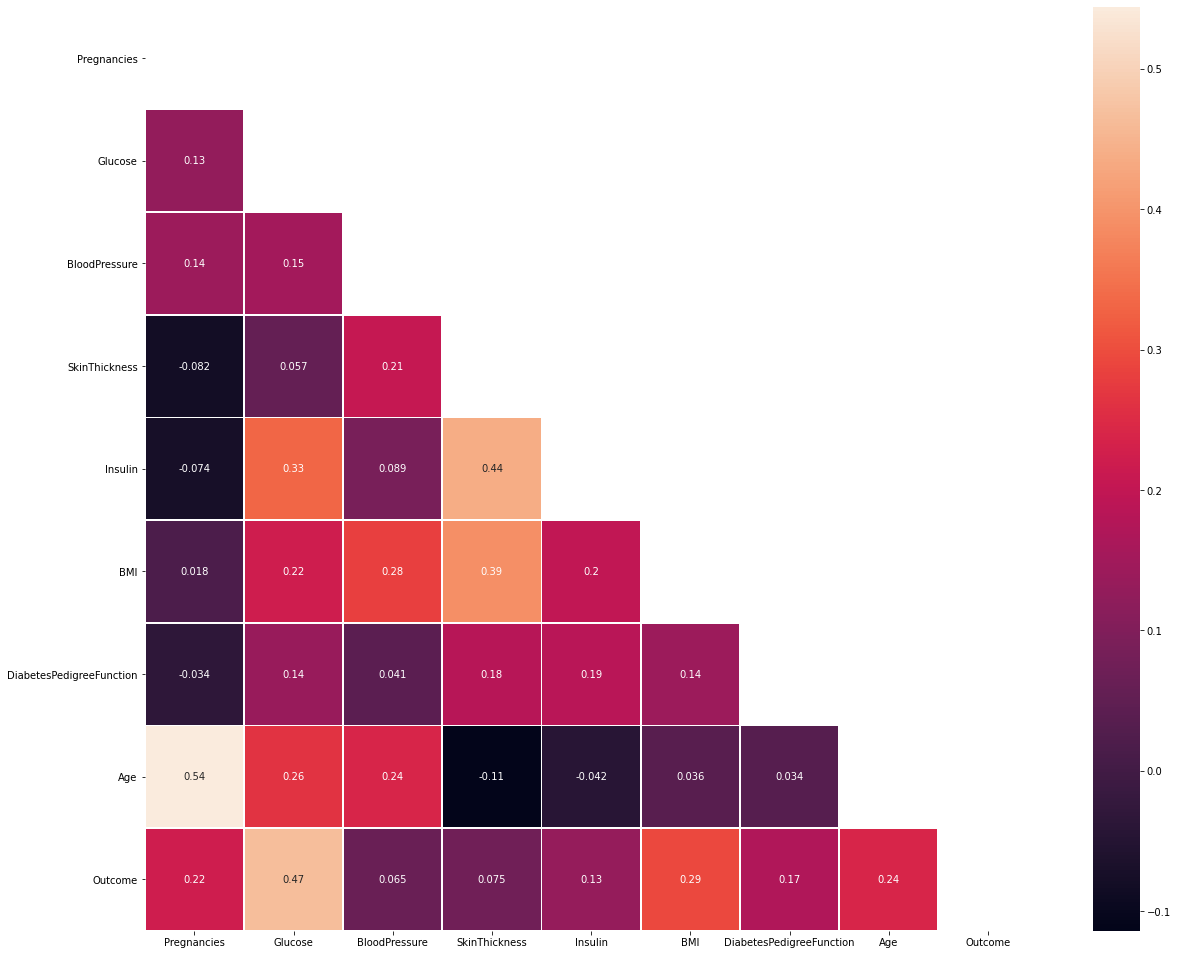

In [7]:
#Finding Correlation among the variables
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [8]:
#Type of Pregnancies with Count
pregnancy_count = df["Pregnancies"].value_counts().reset_index()
pregnancy_count

,index,Pregnancies
0,1,135
1,0,111
2,2,103
3,3,75
4,4,68
5,5,57
6,6,50
7,7,45
8,8,38
9,9,28


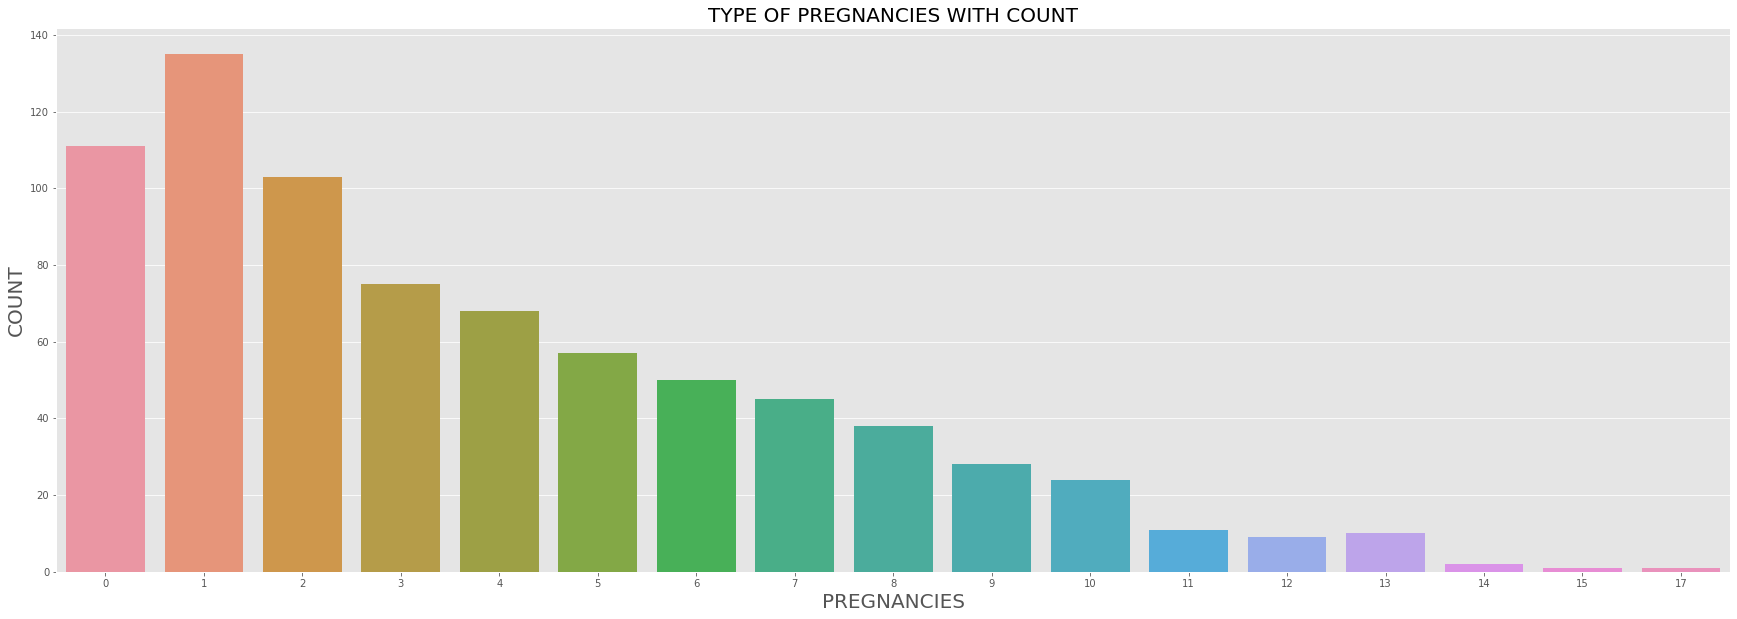

In [9]:
plt.figure(figsize=(30, 10))
plt.style.use("ggplot")
sns.barplot(x=pregnancy_count["index"], y=pregnancy_count["Pregnancies"]);
plt.title("TYPE OF PREGNANCIES WITH COUNT", fontsize=20)
plt.xlabel("PREGNANCIES", fontsize=20)
plt.ylabel("COUNT", fontsize=20)
plt.show()

In [10]:
#Plotting Distribution for each Column in dataset
def distributionPlot(columnName):
    if not columnName == 'Outcome':
        plt.figure()
        ax = sns.distplot(df[columnName][df.Outcome == 1],
                        color="darkturquoise", rug=True)
        sns.distplot(df[columnName][df.Outcome == 0], color="lightcoral", rug=True);
        plt.legend(['Diabetes', 'No Diabetes']) 

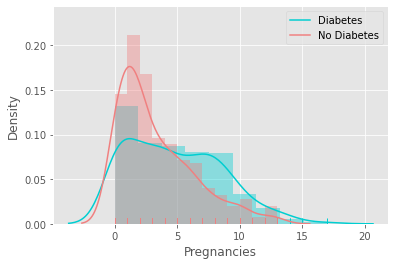

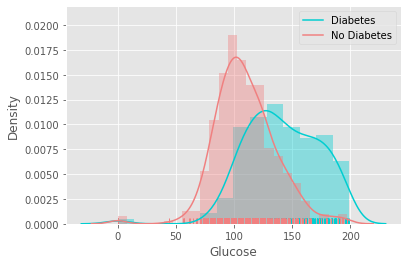

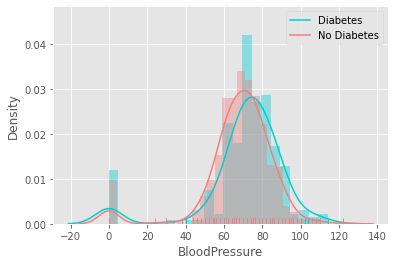

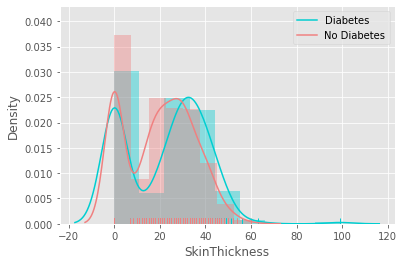

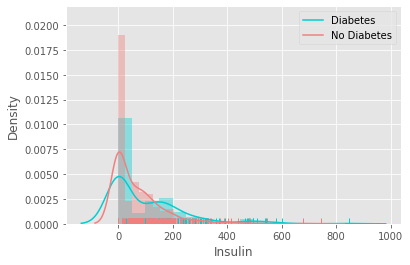

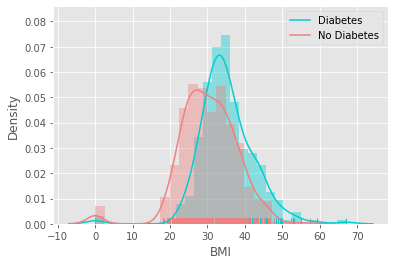

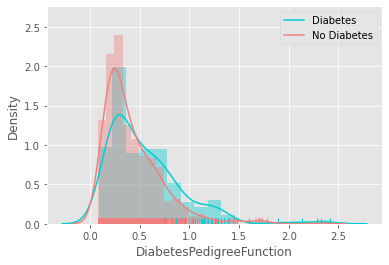

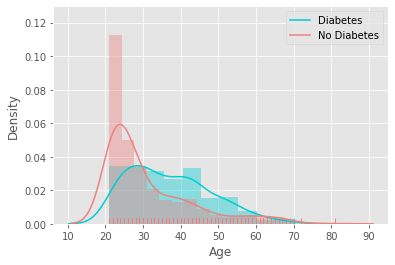

In [11]:
for column in df.columns:
    distributionPlot(column)

###Skewness Correction.

###I found out there were some columns with skewness in the dataset. Here, I'm trying to correct that Skewness

In [12]:
def skewnessCorrector(columnName):
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(df[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(df[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(df[columnName], plot=plt)
    plt.show()
    df[columnName], lam_fixed_acidity = boxcox(
        df[columnName])
    print('''After Correcting''')
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(df[columnName], fit=norm, color="orange");
    plt.title(columnName.capitalize() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(df[columnName], plot=plt)
    plt.show()

Before Correcting
Mu before correcting Diabetespedigreefunction : 0.47187630208333325, Sigma before correcting Diabetespedigreefunction : 0.3311128160286291


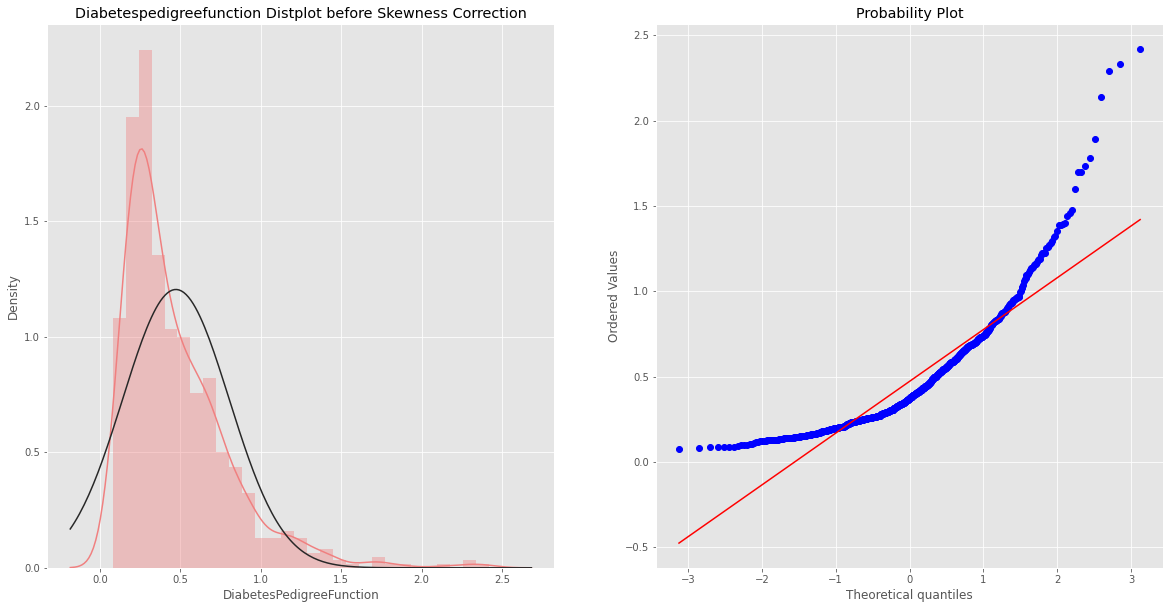

After Correcting
Mu after correcting Diabetespedigreefunction : 0.47187630208333325, Sigma after correcting Diabetespedigreefunction : 0.3311128160286291


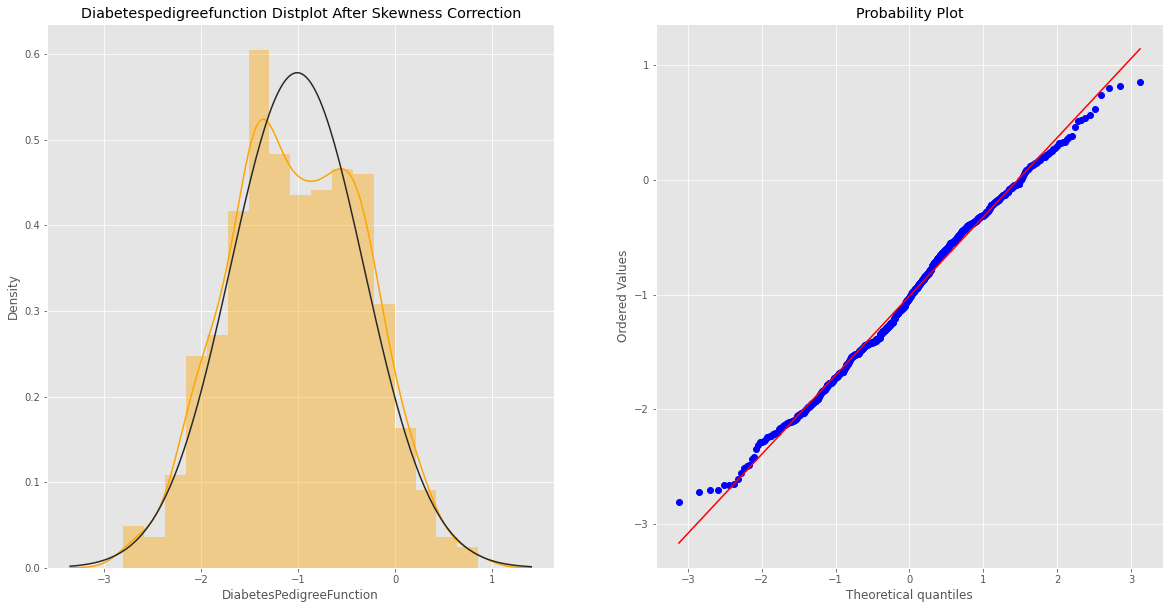

Before Correcting
Mu before correcting Age : 33.240885416666664, Sigma before correcting Age : 11.752572645994181


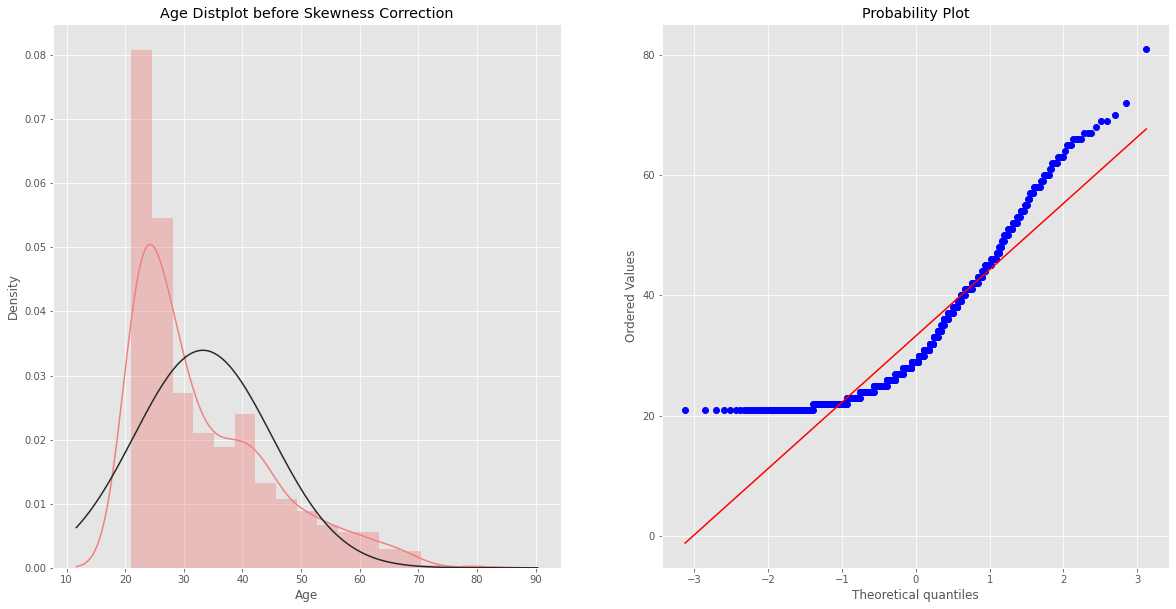

After Correcting
Mu after correcting Age : 33.240885416666664, Sigma after correcting Age : 11.752572645994181


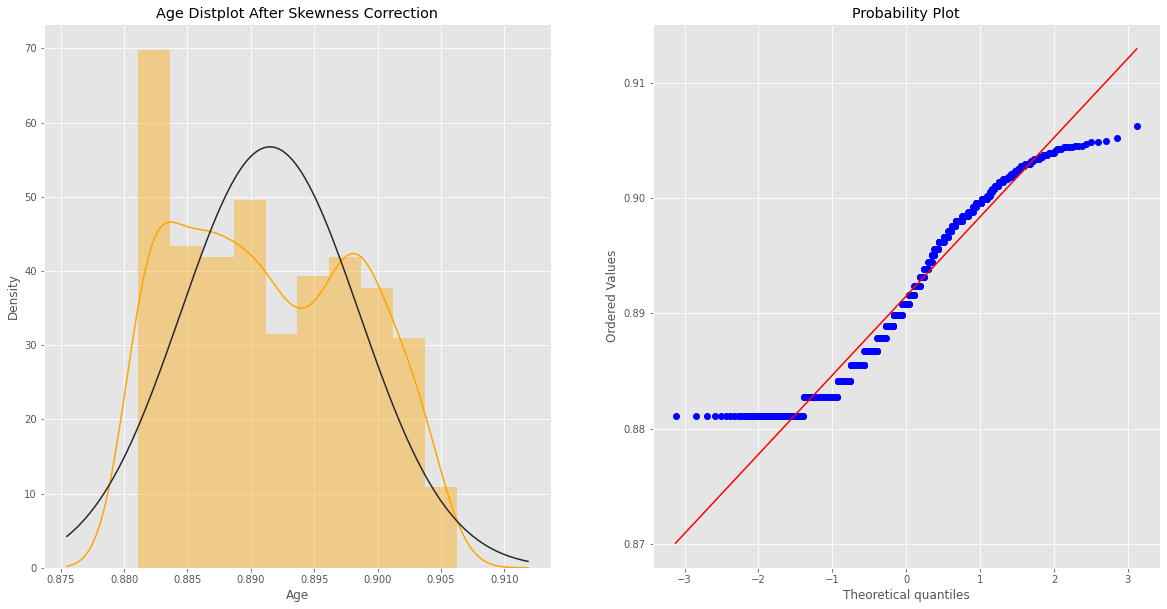

In [13]:
skewColumnList = ['DiabetesPedigreeFunction', 'Age']
for columns in skewColumnList:
    skewnessCorrector(columns)

### Data Preprocessing

In [14]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [15]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [16]:
# Splitting Dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [17]:
# Standardizing Independent Variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training Classifiers on Training Set and drawing Inference

In [18]:
accuracy_scores = {}
def predictor(predictor, params):
    global accuracy_scores
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)

    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set')
        from sklearn.svm import SVC
        classifier = SVC(**params)

    elif predictor == 'knn':
        print('TrainingK-Nearest Neighbours on Training Set')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)

    elif predictor == 'dt':
        print('Training LDecision Tree Classifier on Training Set')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)

    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)

    elif predictor == 'rfc':
        print('Training Random Forest Classifier on Training Set')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)

    classifier.fit(X_train, y_train)

    print('''Prediciting Test Set Result''')
    y_pred = classifier.predict(X_test)
    result = np.concatenate((y_pred.reshape(len(y_pred), 1),
                             y_test.reshape(len(y_test), 1)), 1)
    print(result, '\n')
    print('''Making Confusion Matrix''')
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm, '\n')
    plot_confusion_matrix(classifier, X_test, y_test, cmap="pink")
    print('True Positives :', cm[0][0])
    print('False Positives :', cm[0][1])
    print('False Negatives :', cm[1][0])
    print('True Negatives :', cm[0][1], '\n')

    print('''Classification Report''')
    print(classification_report(y_test, y_pred,
          target_names=['0', '1'], zero_division=1))

    print('''Evaluating Model Performance''')
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, '\n')

    print('''Applying K-Fold Cross validation''')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(
        estimator=classifier, X=X_train, y=y_train, cv=10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100), '\n')

Training Logistic Regression on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0

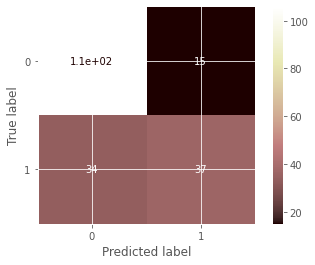

In [19]:
#Training Logistic Regression on Training Set
predictor('lr', {'penalty': 'l1', 'solver': 'liblinear'})

### Training SVM on Training Set

Training Support Vector Machine on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]


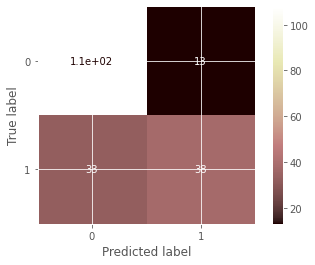

In [20]:
predictor('svm', {'C': 0.25, 'gamma': 0.4, 'kernel': 'linear', 'random_state': 0})

### Training Kernel SVM on Training Set

Training Support Vector Machine on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]


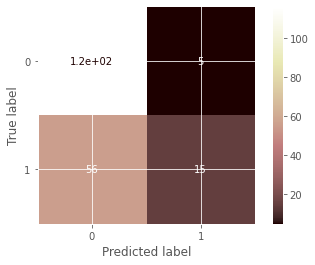

In [21]:
predictor('svm', {'C': 0.25, 'gamma': 0.4, 'kernel': 'rbf', 'random_state': 0})

### Training K-Nearest Neighbours on Training Set

Training LDecision Tree Classifier on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 

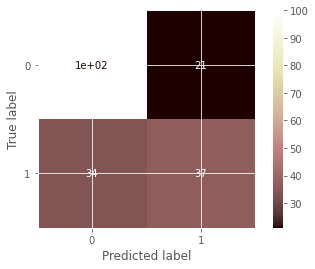

In [22]:
predictor('dt', {'criterion': 'gini', 'max_features': 'auto',
          'splitter': 'best', 'random_state': 0})

### Training Decision Tree on Training Set

Training LDecision Tree Classifier on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 

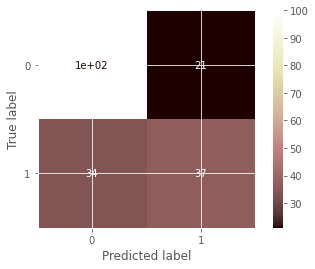

In [23]:
predictor('dt', {'criterion': 'gini', 'max_features': 'auto',
          'splitter': 'best', 'random_state': 0})

### Training Naive Bayes on Training Set

Training Naive Bayes Classifier on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]


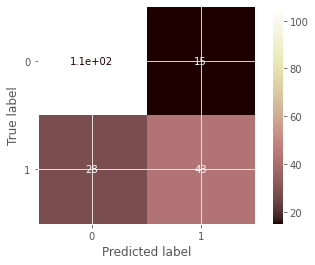

In [24]:
predictor('nb', {})

### Training Random Forest Classifier on Training Set

Training Random Forest Classifier on Training Set
Prediciting Test Set Result
[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1

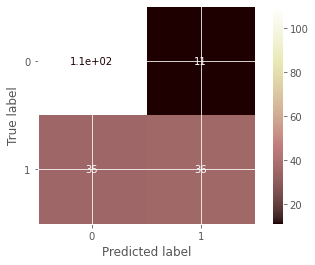

In [25]:
predictor('rfc', {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50, 'random_state': 0})

## Finding which Classifier performed best

In [26]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) with an accuracy of  77.78


In [27]:
accuracy_scores

{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'): 69.12280701754386,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'): 69.12280701754386,
 GaussianNB(priors=None, var_smoothing=1e-09): 74.66122202056866,
 LogisticRegression(C=1.0, cla

In [28]:
model_accuracies = list(accuracy_scores.values())
model_accuracies

[77.77979431336964,
 77.77676950998186,
 69.79733817301876,
 69.12280701754386,
 69.12280701754386,
 74.66122202056866,
 77.09013914095584]

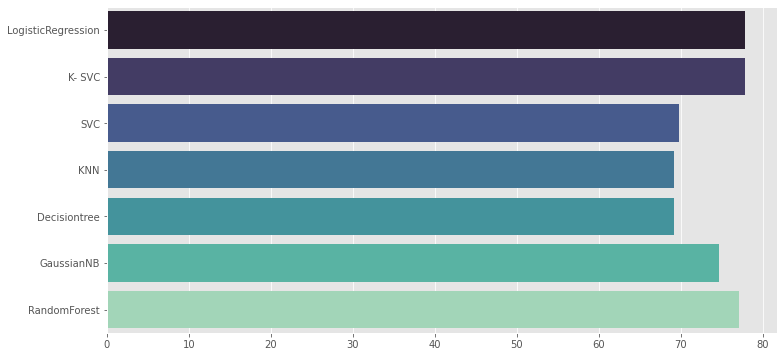

In [30]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = ['LogisticRegression','K- SVC','SVC', 'KNN', 'Decisiontree', 'GaussianNB', 'RandomForest']
sns.barplot(x=model_accuracies, y=model_names, palette='mako')

In [35]:
#Save model in Pickle(.pkl):
from sklearn.externals import joblib  
from sklearn.linear_model import LogisticRegression
# Fit the model (example of a model in sklearn)
model = LogisticRegression(penalty ='l1', solver='liblinear')
model.fit(X_train, y_train)
#working directory
joblib_file = "best_Lg_model.pkl"   
joblib.dump(model, joblib_file)


['best_Lg_model.pkl']